## 데이터 준비
* www.kaggle.com/c/rossmann-store-sales/data 에서 자료를 다운받는다. 
* zip을 풀어서 파일을 colab에 업로드 

In [1]:
# 범주형 자료의 수량화 =====================================================
x=[{'city':'seoul','temp':10.0}, {'city':'Dubai', 'temp':33.5}, {'city':'LA','temp':20.0}]

In [2]:
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
vec.fit_transform(x) # X를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [4]:
vec1=DictVectorizer(sparse=True) # 메모리를 줄이기 위해 sparse=True
x1=vec1.fit_transform(x)

In [5]:
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
x1.toarray() # sparse=True를 풀고 배열로 변경
print(vec1.get_feature_names_out())

['city=Dubai' 'city=LA' 'city=seoul' 'temp']


In [10]:
# 텍스트 자료의 수량화 =====================================================
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']

In [12]:
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vec2 = CountVectorizer()# default는 sparse=True
t=vec2.fit_transform(text).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환
t1=pd.DataFrame(t, columns=vec2.get_feature_names_out())

In [17]:
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names_out())

In [20]:
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


In [22]:
import numpy as np
# 결측자료 대체 ===================================================== 
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [23]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean')
im.fit(x_miss)

#from sklearn.preprocessing import Imputer
#im=Imputer(strategy='mean') 
#im.fit_transform(x_miss) # 열의 평균값으로 대체

SimpleImputer()

In [25]:
import pandas as pd

df1=pd.read_csv("./train.csv",engine='python')
print(df1.shape)
type(df1)

(83898, 9)


pandas.core.frame.DataFrame

In [26]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [27]:
df2=pd.read_csv("./store.csv",engine='python')
df2.shape

(1115, 10)

In [28]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
df=pd.merge(df1,df2,on='Store')
df.shape

(83898, 18)

In [30]:
df.dtypes

Store                          int64
DayOfWeek                    float64
Date                          object
Sales                        float64
Customers                    float64
Open                         float64
Promo                        float64
StateHoliday                  object
SchoolHoliday                float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [31]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)


print('Original dataset shape %s' % Counter(y))  

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


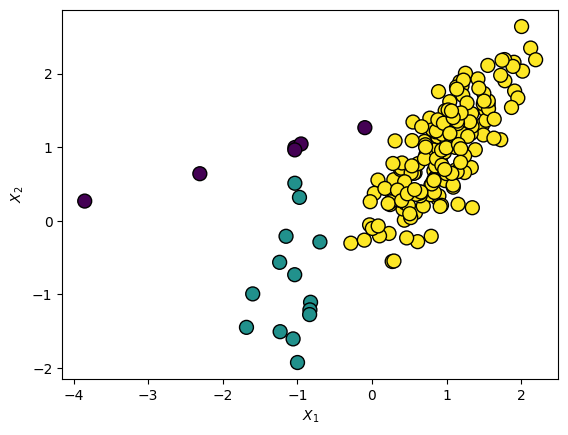

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [33]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


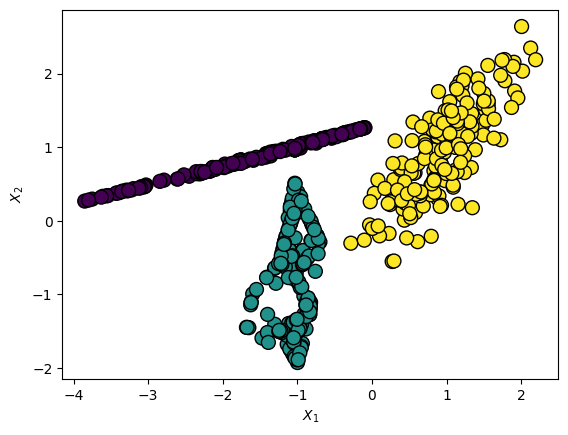

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [35]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


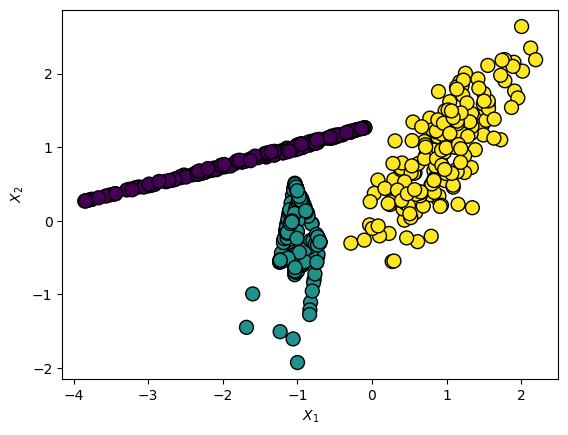

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [37]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)

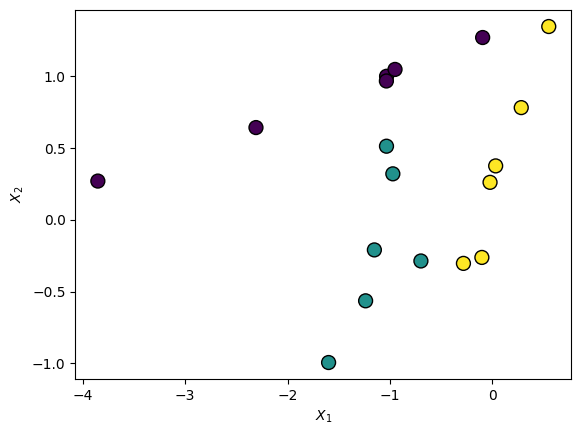

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()